Here the WGS data of new MAC enriched DNA from KD4, KD8 and KD9 is analysed: 2 replicates of AS17, PS17, PGM and 1 replicate of ND7

In [1]:
#import the relevant packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import pandas as pd
from functools import partial, reduce
import glob
from matplotlib import rc

plt.rcParams["font.family"] = "Arial" 

In [2]:
# prepare files from scratch with pandas data frames

files = glob.glob("input_files/*.tab")

# retrieve file names

names = []
for f in files:
    names.append(f.split("/")[1])

dfs = dict.fromkeys(names, None)

# store the results from eXpress as dataframes in dictionary
count = int(-1)
for f in files:
    count += 1
    irs = pd.read_csv(f, sep="\t")
    dfs[names[count]] = irs

#drop the columns not needed
for f in names:
    n = f.split(".")[0]
    dfs[f] = dfs[f].drop(columns= ['ies+','ies-']).rename({'ies_ret': n}, axis='columns')

# merge the dataframes into one big dataframe 
my_reduce = partial(pd.merge, on='ies_name', how='outer')                                                              
IRS_df = reduce(my_reduce, dfs.values())
#IRS_df = uniq_df.set_index(['target_id'])


In [3]:
# import IES lengths as data frame
header = ['ies_name', 'IES_length']
df_length = pd.read_csv("input_files/IES_length.txt.gz", sep=" ", header = None, compression = 'gzip', 
                        names= header, index_col=False)

# merge the IES lengths into one big dataframe 
IRS_df_length = IRS_df.merge(df_length , on='ies_name', how='outer')                                                              


In [4]:
df_otherKDs = pd.read_csv("huge_IRS_tab/PS17s-ICOP-AS17-all-TOU1-Ptiwi-Ku80s.tab.gz", 
                          sep="\t", compression = 'gzip')
df_otherKDs = df_otherKDs.rename({'ID': 'ies_name'}, axis='columns')
# merge the IES lengths into one other KDs
df_otherKDs = df_otherKDs.merge(df_length , on='ies_name', how='outer')


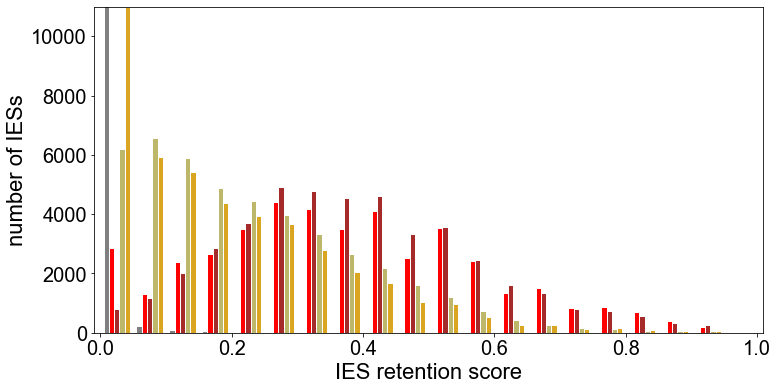

In [5]:
# plot the PS17 IRSs

plt.figure(figsize=(12,6))
plt.hist((IRS_df_length['CTRL_PS17_c'], IRS_df_length['PS17_a'], IRS_df_length['PS17_b'], 
          IRS_df_length['PS17_c'], IRS_df_length['PS17_d']), 
         bins=np.arange(0, 1.0, 0.05), 
         color=['grey','red','brown','darkkhaki','goldenrod'], ec = 'white', lw=1)
plt.xlabel('IES retention score', fontsize=22) 
plt.ylabel('number of IESs', fontsize=22)
#plt.legend(['ND7-KD','PS17-a-KD','PS17-b-KD','PS17-c-KD','PS17-d-KD']) # ledgend for the subset using customized KD-names
plt.axis(xmax=1.01, xmin=-0.01)
plt.axis(ymax=11000, ymin=0)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

#plt.savefig("output_files/PS17_89.pdf")

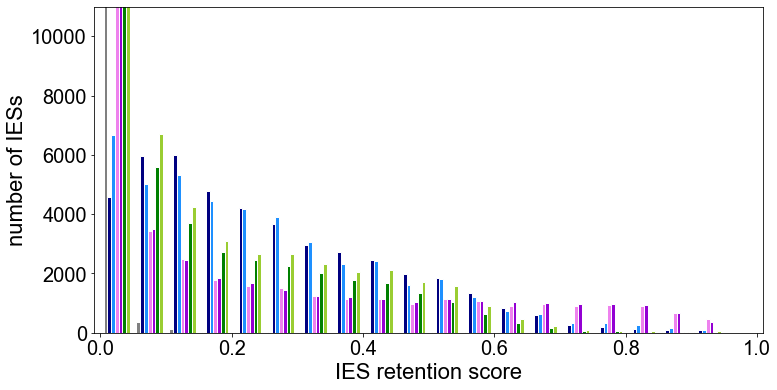

In [15]:
# plot the AS17 IRSs

plt.figure(figsize=(12,6))

plt.hist((IRS_df_length['CTRL_AS17_a'], IRS_df_length['AS17_c'], IRS_df_length['AS17_d'], 
          IRS_df_length['AS17_e'], IRS_df_length['AS17_f'], IRS_df_length['AS17_a'], 
          IRS_df_length['AS17_b']), bins=np.arange(0, 1.0, 0.05), ec = 'white', lw=1,
          color=['grey','navy','dodgerblue','violet','darkviolet','green','yellowgreen'])
plt.xlabel('IES retention score', fontsize=22)
plt.ylabel('number of IESs', fontsize=22)
#plt.legend(['ND7-KD','AS17-a-KD','AS17-b-KD','AS17-c-KD','AS17-d-KD','AS17-e-KD','AS17-f-KD']) # ledgend for the subset using customized KD-names
plt.axis(xmax=1.01, xmin=-0.01)
plt.axis(ymax=11000, ymin=0)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);         

plt.savefig("output_files/AS17_489.pdf")

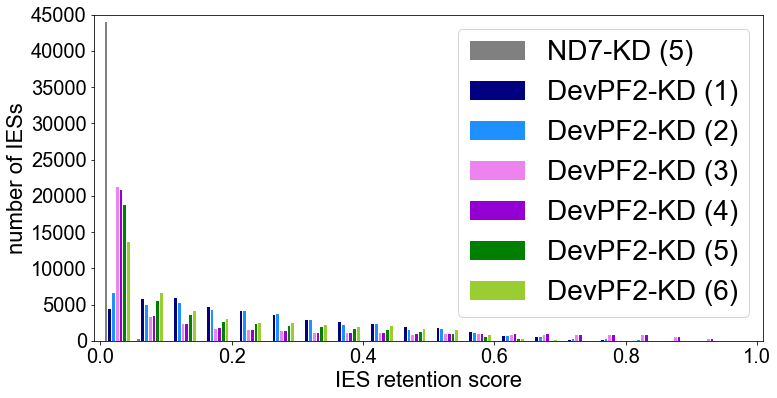

In [22]:
# plot the AS17 IRSs in full scale

plt.figure(figsize=(12,6))

plt.hist((IRS_df_length['CTRL_AS17_a'], IRS_df_length['AS17_c'], IRS_df_length['AS17_d'], 
          IRS_df_length['AS17_e'], IRS_df_length['AS17_f'],IRS_df_length['AS17_a'], 
          IRS_df_length['AS17_b']), bins=np.arange(0, 1.0, 0.05), ec = 'white', lw=1,
          color=['grey','navy','dodgerblue','violet','darkviolet','green','yellowgreen'])
plt.xlabel('IES retention score', fontsize=22)
plt.ylabel('number of IESs', fontsize=22)
plt.legend(['ND7-KD (5)','DevPF2-KD (1)','DevPF2-KD (2)','DevPF2-KD (3)','DevPF2-KD (4)',
            'DevPF2-KD (5)','DevPF2-KD (6)'],
          fontsize = 28) # ledgend for the subset using customized KD-names
plt.axis(xmax=1.01, xmin=-0.01)
plt.axis(ymax=45000, ymin=0)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);  

plt.savefig("output_files/DevPF2_489L.pdf")

In [14]:
# reduce the dataframe to the 10% IRS values in a given knockdown
# generate a threshold: the 90th quantile
Pb_top10percent = np.nanpercentile(IRS_df_length['PS17_b'], 90)
Af_top10percent = np.nanpercentile(IRS_df_length['AS17_f'], 90)
dcl235_top10percent = np.nanpercentile(df_otherKDs['DCL2/3/5'], 90)
SPT5m_top10percent = np.nanpercentile(df_otherKDs['SPT5m'], 90)
PGM_top10percent = np.nanpercentile(df_otherKDs['PGM'], 90)
EZL1_top10percent = np.nanpercentile(df_otherKDs['EZL1'], 90)
KU80cr2_top10percent = np.nanpercentile(df_otherKDs['KU80c-r2'], 90)
ISWI1_top10percent = np.nanpercentile(df_otherKDs['ISWI_b'], 90)

# Filter the DataFrame based on the threshold
Pb_top10percent_df = IRS_df_length[IRS_df_length['PS17_b'] > Pb_top10percent]
Af_top10percent_df = IRS_df_length[IRS_df_length['AS17_f'] > Af_top10percent]
dcl235_top10percent_df = df_otherKDs[df_otherKDs['DCL2/3/5'] > dcl235_top10percent]
SPT5m_top10percent_df = df_otherKDs[df_otherKDs['SPT5m'] > SPT5m_top10percent]
PGM_top10percent_df = df_otherKDs[df_otherKDs['PGM'] > PGM_top10percent]
EZL1_top10percent_df = df_otherKDs[df_otherKDs['EZL1'] > EZL1_top10percent]
KU80cr2_top10percent_df = df_otherKDs[df_otherKDs['KU80c-r2'] > KU80cr2_top10percent]
ISWI1_top10percent_df = df_otherKDs[df_otherKDs['ISWI_b'] > ISWI1_top10percent]

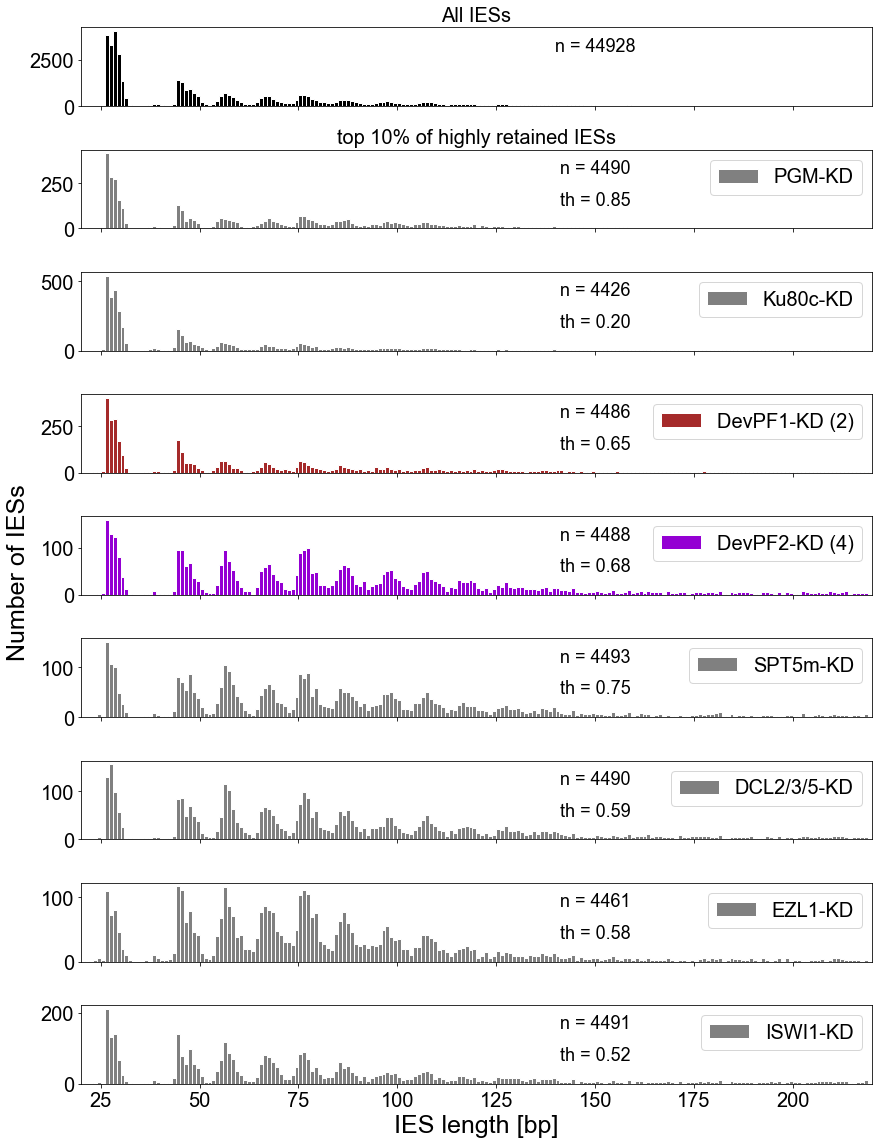

In [16]:
# plot the lengths of highly retained IESs (highest 10% in the KDs)

fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=9, ncols=1, sharex=True, 
                                                                  figsize = (12,16));

ax0.hist(IRS_df_length['IES_length'], bins=range(20, 220, 1), ec='white', fc='black');
ax1.hist(PGM_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='grey', 
         label = "PGM-KD");
ax2.hist(KU80cr2_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='grey', 
         label = "Ku80c-KD");
ax3.hist(Pb_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='brown', 
         label = "DevPF1-KD (2)");
ax4.hist(Af_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='darkviolet', 
         label = "DevPF2-KD (4)");
ax5.hist(SPT5m_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='grey', 
         label = "SPT5m-KD");
ax6.hist(dcl235_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='grey', 
         label = "DCL2/3/5-KD");
ax7.hist(EZL1_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='grey', 
         label = "EZL1-KD");
ax8.hist(ISWI1_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='grey', 
         label = "ISWI1-KD");

# provide number of IESs in this analysis in diagrams
ax0.annotate(f'n = {IRS_df_length.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax1.annotate(f'n = {PGM_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax2.annotate(f'n = {KU80cr2_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax3.annotate(f'n = {Pb_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax4.annotate(f'n = {Af_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax5.annotate(f'n = {SPT5m_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax6.annotate(f'n = {dcl235_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax7.annotate(f'n = {EZL1_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax8.annotate(f'n = {ISWI1_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)

# provide number of IRS-threshold th in this analysis in diagrams
ax1.annotate('th = %.2f' % (PGM_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax2.annotate('th = %.2f' % (KU80cr2_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax3.annotate('th = %.2f' % (Pb_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax4.annotate('th = %.2f' % (Af_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax5.annotate('th = %.2f' % (SPT5m_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax6.annotate('th = %.2f' % (dcl235_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax7.annotate('th = %.2f' % (EZL1_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax8.annotate('th = %.2f' % (ISWI1_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)

ax1.legend(fontsize=20);
ax2.legend(fontsize=20);
ax3.legend(fontsize=20);
ax4.legend(fontsize=20);
ax5.legend(fontsize=20);
ax6.legend(fontsize=20);
ax7.legend(fontsize=20);
ax8.legend(fontsize=20);

ax0.set_title("All IESs", fontsize=20)
ax1.set_title("top 10% of highly retained IESs", fontsize=20)

ax0.tick_params(axis='both', which='major', labelsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax5.tick_params(axis='both', which='major', labelsize=20)
ax6.tick_params(axis='both', which='major', labelsize=20)
ax7.tick_params(axis='both', which='major', labelsize=20)
ax8.tick_params(axis='both', which='major', labelsize=20)

ax8.set_xlabel('IES length [bp]', fontsize=25)
ax8.set_xlim([20,220]);

fig.text(0.00001, 0.5, 'Number of IESs', ha='center', va='center', fontsize=25, rotation='vertical');
fig.tight_layout();

fig.savefig("output_files/DevPFs_IES-lengths_highIRS_otherKDs.pdf", bbox_inches='tight')

In [18]:
# mean and median length of top 10% highly retained IESs

datadfs = [PGM_top10percent_df, KU80cr2_top10percent_df, Pb_top10percent_df, Af_top10percent_df, 
           SPT5m_top10percent_df, dcl235_top10percent_df, EZL1_top10percent_df, ISWI1_top10percent_df]
samplenames = ["PGM-KD", "Ku80c-KD", "DevPF1-2-KD", "DevPF2-4-KD", "SPT5m-KD", "DCL2/3/5-KD", "EZL1-KD", 
               "ISWI1-KD"]

# define table header
colnames = ['sample','median', 'mean']
columns_all = [['all_IESs', np.median(IRS_df_length['IES_length']), np.mean(IRS_df_length['IES_length'])]]
count = int(-1)

# fill table rows
for i in samplenames:
    count += 1
    columns_all.append([i, np.median(datadfs[count]['IES_length']), np.mean(datadfs[count]['IES_length'])])
    
table_lengths = pd.DataFrame(columns_all, columns = colnames)
print(table_lengths)

table_lengths.to_csv("output_files/KD489_statistics_highIRS_lengths_otherKDs.csv")

        sample  median        mean
0     all_IESs    50.0   79.129274
1       PGM-KD    67.0  129.953675
2     Ku80c-KD    45.0   86.787845
3  DevPF1-2-KD    66.0  143.850869
4  DevPF2-4-KD    84.5  134.778743
5     SPT5m-KD    85.0  179.394836
6  DCL2/3/5-KD    85.0  153.203563
7      EZL1-KD    77.0  145.693791
8     ISWI1-KD    77.0  148.605433


In [17]:
# reduce the dataframe to the 10% IRS values in a given knockdown
# generate a threshold: the 90th quantile
Pa_top10percent = np.nanpercentile(IRS_df_length['PS17_a'], 90)
Pc_top10percent = np.nanpercentile(IRS_df_length['PS17_c'], 90)
Pd_top10percent = np.nanpercentile(IRS_df_length['PS17_d'], 90)
Ac_top10percent = np.nanpercentile(IRS_df_length['AS17_c'], 90)
Ad_top10percent = np.nanpercentile(IRS_df_length['AS17_d'], 90)
Ae_top10percent = np.nanpercentile(IRS_df_length['AS17_e'], 90)
Aa_top10percent = np.nanpercentile(IRS_df_length['AS17_a'], 90)
Ab_top10percent = np.nanpercentile(IRS_df_length['AS17_b'], 90)

# Step 4: Filter the DataFrame based on the threshold
Pa_top10percent_df = IRS_df_length[IRS_df_length['PS17_a'] > Pa_top10percent]
Pc_top10percent_df = IRS_df_length[IRS_df_length['PS17_c'] > Pc_top10percent]
Pd_top10percent_df = IRS_df_length[IRS_df_length['PS17_d'] > Pd_top10percent]
Ac_top10percent_df = IRS_df_length[IRS_df_length['AS17_c'] > Ac_top10percent]
Ad_top10percent_df = IRS_df_length[IRS_df_length['AS17_d'] > Ad_top10percent]
Ae_top10percent_df = IRS_df_length[IRS_df_length['AS17_e'] > Ae_top10percent]
Aa_top10percent_df = IRS_df_length[IRS_df_length['AS17_a'] > Aa_top10percent]
Ab_top10percent_df = IRS_df_length[IRS_df_length['AS17_b'] > Ab_top10percent]


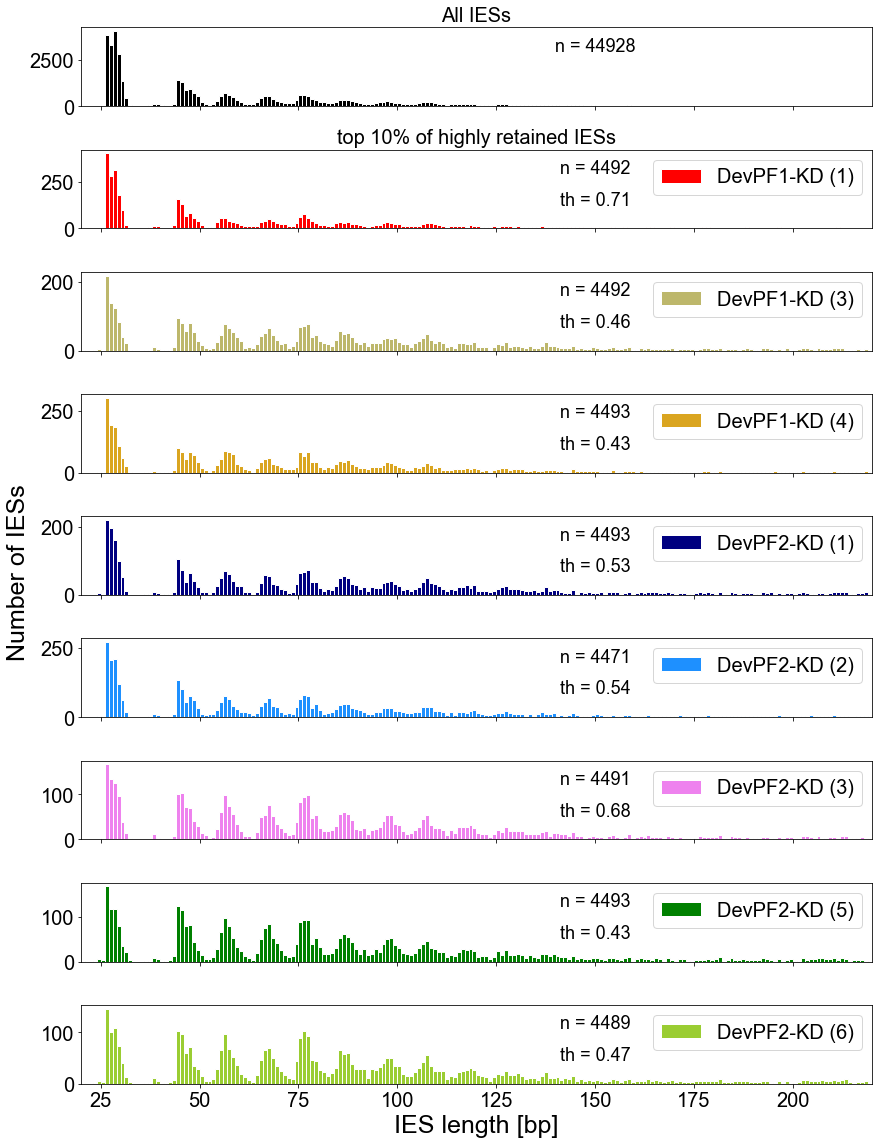

In [18]:
# plot the lengths of highly retained IESs (highest 10% in the KDs)

fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(nrows=9, ncols=1, sharex=True, 
                                                                  figsize = (12,16));

ax0.hist(IRS_df_length['IES_length'], bins=range(20, 220, 1), ec='white', fc='black');
ax1.hist(Pa_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='red', 
         label = "DevPF1-KD (1)");
ax2.hist(Pc_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='darkkhaki', 
         label = "DevPF1-KD (3)");
ax3.hist(Pd_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='goldenrod', 
         label = "DevPF1-KD (4)");
ax4.hist(Ac_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='navy', 
         label = "DevPF2-KD (1)");
ax5.hist(Ad_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='dodgerblue', 
         label = "DevPF2-KD (2)");
ax6.hist(Ae_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='violet', 
         label = "DevPF2-KD (3)");
ax7.hist(Aa_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='green', 
         label = "DevPF2-KD (5)");
ax8.hist(Ab_top10percent_df['IES_length'], bins=range(20, 220, 1), ec='white', fc='yellowgreen', 
         label = "DevPF2-KD (6)");

# provide number of IESs in this analysis in diagrams
ax0.annotate(f'n = {IRS_df_length.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax1.annotate(f'n = {Pa_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax2.annotate(f'n = {Pc_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax3.annotate(f'n = {Pd_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax4.annotate(f'n = {Ac_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax5.annotate(f'n = {Ad_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax6.annotate(f'n = {Ae_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax7.annotate(f'n = {Aa_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)
ax8.annotate(f'n = {Ab_top10percent_df.shape[0]}', xy = (0.65,0.7), ha='center',
             xycoords='axes fraction',fontsize=18)

# provide number of IRS-threshold th in this analysis in diagrams
ax1.annotate('th = %.2f' % (Pa_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax2.annotate('th = %.2f' % (Pc_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax3.annotate('th = %.2f' % (Pd_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax4.annotate('th = %.2f' % (Ac_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax5.annotate('th = %.2f' % (Ad_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax6.annotate('th = %.2f' % (Ae_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax7.annotate('th = %.2f' % (Aa_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)
ax8.annotate('th = %.2f' % (Ab_top10percent), xy = (0.65,0.3), ha='center',
             xycoords='axes fraction',fontsize=18)

ax1.legend(fontsize=20);
ax2.legend(fontsize=20);
ax3.legend(fontsize=20);
ax4.legend(fontsize=20);
ax5.legend(fontsize=20);
ax6.legend(fontsize=20);
ax7.legend(fontsize=20);
ax8.legend(fontsize=20);

ax0.set_title("All IESs", fontsize=20)
ax1.set_title("top 10% of highly retained IESs", fontsize=20)

ax0.tick_params(axis='both', which='major', labelsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax5.tick_params(axis='both', which='major', labelsize=20)
ax6.tick_params(axis='both', which='major', labelsize=20)
ax7.tick_params(axis='both', which='major', labelsize=20)
ax8.tick_params(axis='both', which='major', labelsize=20)

ax8.set_xlabel('IES length [bp]', fontsize=25)
ax8.set_xlim([20,220]);

fig.text(0.00001, 0.5, 'Number of IESs', ha='center', va='center', fontsize=25, rotation='vertical');
fig.tight_layout();

fig.savefig("output_files/DevPFs_IES-lengths_highIRS_KD489.pdf", bbox_inches='tight')

In [19]:
# mean and median length of top 10% highly retained IESs


datadfs2 = [Pa_top10percent_df, Pc_top10percent_df, Pd_top10percent_df, Ac_top10percent_df, 
           Ad_top10percent_df, Ae_top10percent_df, Aa_top10percent_df, Ab_top10percent_df]
samplenames2 = ["DevPF1-KD (1)", "DevPF1-KD (3)", "DevPF1-KD (4)", "DevPF2-KD (1)", "DevPF2-KD (2)", 
                "DevPF2-KD (3)", "DevPF2-KD (5)", "DevPF2-KD (6)"]

# define table header
colnames2 = ['sample','median', 'mean']
columns_all2 = [['all_IESs', np.median(IRS_df_length['IES_length']), np.mean(IRS_df_length['IES_length'])]]
count = int(-1)

# fill table rows
for i in samplenames2:
    count += 1
    columns_all2.append([i, np.median(datadfs2[count]['IES_length']), np.mean(datadfs2[count]['IES_length'])])
    
table_lengths2 = pd.DataFrame(columns_all2, columns = colnames2)
print(table_lengths2)

table_lengths2.to_csv("output_files/KD489_statistics_highIRS_lengths_KD489.csv")

          sample  median        mean
0       all_IESs    50.0   79.129274
1  DevPF1-KD (1)    62.0  124.907836
2  DevPF1-KD (3)    85.0  184.107079
3  DevPF1-KD (4)    75.0  160.373025
4  DevPF2-KD (1)    86.0  166.925662
5  DevPF2-KD (2)    76.0  141.099083
6  DevPF2-KD (3)    81.0  129.975284
7  DevPF2-KD (5)    79.0  133.877365
8  DevPF2-KD (6)    85.0  143.609044


Check the retention of the IESs in PTIWI10 and PTIWI11 (because they show reduction in mRNA levels that might be caused by failed excision of IESs in their coding sequence).

PTIWI10 (PTET.51.1.T0240239): IES promotor (IESPGM.PTET51.1.24.407807), coding (IESPGM.PTET51.1.24.408279)
PTIWI11 (PTET.51.1.G0620215): IES coding (IESPGM.PTET51.1.62.345420)

In [6]:
options = ['IESPGM.PTET51.1.24.407807', 'IESPGM.PTET51.1.24.408279', 'IESPGM.PTET51.1.62.345420']
  
# selecting rows based on condition
PTIWIies_df = IRS_df_length.loc[IRS_df_length['ies_name'].isin(options)]

In [7]:
PTIWIies_df

,ies_name,AS17_a,AS17_b,AS17_c,AS17_d,AS17_e,AS17_f,CTRL_AS17_a,CTRL_PS17_c,CTRL_PS17_d,PS17_a,PS17_b,PS17_c,PS17_d,IES_length
12196,IESPGM.PTET51.1.62.345420,0.0253,0.0082,0.0976,0.0175,0.0,0.0000,0.0,0.0,0.0,0.0870,0.0769,0.0435,0.0224,29
25930,IESPGM.PTET51.1.24.407807,0.0000,0.0000,0.0741,0.2353,0.0,0.0000,0.0,0.0,0.0,0.2903,0.1515,0.0268,0.0095,29
25931,IESPGM.PTET51.1.24.408279,0.0000,0.0000,0.0147,0.1452,0.0,0.0083,0.0,0.0,0.0,0.1136,0.0577,0.0645,0.0066,29


In [9]:

PTIWIies_df.to_csv("output_files/PTIWI10-11_IESs_IRS_KD489.csv")